In [1]:
import os
from tqdm.notebook import tqdm
import gzip
import pandas as pd
import seaborn as sns
import timeit
import json
import matplotlib.pyplot as plt
import numpy as np
import emoji

# Load data

In [2]:
tweets = pd.read_pickle('../data/tweets.pkl.bz2', compression='bz2')
tweets.head()

,id,created_at,source,possibly_sensitive,author_id,text,person_annotations,place_annotations,product_annotations,organization_annotations,...,like_count,quote_count,author_name,verified,protected,profile_image_url,author_followers_count,animated_gif_count,photo_count,video_count
0,1588682493833551872,2022-11-04 23:59:57,Twitter for iPhone,0,580633644,The business of businesses is climate-change a...,0,0,0,0,...,0,0,Robert Han @RobertHon0911,0,0,1,57,0,0,0
1,1588682474141339648,2022-11-04 23:59:52,Twitter Web App,1,2711676037,#howtowrite #howtopublish @authoraid \nA case ...,0,0,0,0,...,1,0,Krishna Koushik @SapiensMyopia,0,0,1,56,0,0,0
2,1588682395393622016,2022-11-04 23:59:34,Twitter for iPhone,0,1573331383984226304,"Hundreds of elephants, zebras die as Kenya wea...",0,0,0,0,...,1,0,Nature Chick @EarthBulletin,0,0,1,553,0,0,0
3,1588682374103334912,2022-11-04 23:59:28,Twitter for iPhone,0,1674604256,If the free market is the answer to our climat...,0,1,0,0,...,0,0,Nick Yates @nickyatesworld,0,0,1,190,0,0,0
4,1588682360253739008,2022-11-04 23:59:25,Twitter for iPhone,0,1144336826133442560,"Tuned in to the local Seattle fake, corrupt, w...",0,1,0,0,...,3,0,greg vanommeren @GregVanommeren,0,0,1,521,0,0,0


In [15]:
tweets.columns

Index(['id', 'created_at', 'source', 'possibly_sensitive', 'author_id', 'text',
       'person_annotations', 'place_annotations', 'product_annotations',
       'organization_annotations', 'other_annotations', 'urls_count',
       'url_image_count', 'mentions_count', 'mentions_verifications',
       'mentions_followers', 'hashtags', 'cashtags', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'author_name', 'verified',
       'protected', 'profile_image_url', 'author_followers_count',
       'animated_gif_count', 'photo_count', 'video_count'],
      dtype='object')

In [3]:
tweets.author_followers_count.max()

133387583

In [5]:
best = tweets.groupby('author_id').filter(lambda x : x.author_followers_count.mean() > 13_000_000)

In [8]:
authors = best.groupby('author_id')

In [14]:
for author in tqdm(authors): 
    for index1 in range(author[1].shape[0]):       
        row1 = author[1].iloc[index1]
        for index2 in range(index1 + 1, min(author[1].shape[0], index1 + 1000)):
            row2 = author[1].iloc[index2]
                
            if (row1['created_at'] - row2['created_at']).days >= 7:
                break
            
            score1 = row1['like_count'] + row1['retweet_count'] + row1['reply_count']
            score2 = row2['like_count'] + row2['retweet_count'] + row2['reply_count']
            maxi = max(score1, score2)
            mini = max(1, min(score1, score2))
            if (maxi - mini) < 20000 or maxi / mini < 5:
                continue
            
            print(row1['author_name'], row1['id'], row2['id'])



  0%|          | 0/75 [00:00<?, ?it/s]

BBC News (World) @BBCWorld 1367449159159136256 1365158420429570048
BBC News (World) @BBCWorld 1365158420429570048 1364967913954934784
The New York Times @nytimes 1572427962984579072 1570141598461173760
The New York Times @nytimes 1572276978673385472 1570141598461173760
The New York Times @nytimes 1572186348991250432 1570141598461173760
The New York Times @nytimes 1571959866394017792 1570141598461173760
The New York Times @nytimes 1571603742272667648 1570141598461173760
The New York Times @nytimes 1571399891984711680 1570141598461173760
The New York Times @nytimes 1571324402653954048 1570141598461173760
The New York Times @nytimes 1571248889612607488 1570141598461173760
The New York Times @nytimes 1571131871311847424 1570141598461173760
The New York Times @nytimes 1570880283494195200 1570141598461173760
The New York Times @nytimes 1570532952760516608 1570141598461173760
The New York Times @nytimes 1570313228777041920 1570141598461173760
The New York Times @nytimes 1570185659259957248 15

Narendra Modi @narendramodi 1361679865561436160 1359546935586287616
ABC News @ABC 1564608540970450944 1562186286277984256
ABC News @ABC 1564377166875426816 1562186286277984256
ABC News @ABC 1564247344203309056 1562186286277984256
ABC News @ABC 1564087931094155264 1562186286277984256
ABC News @ABC 1563897948152500224 1562186286277984256
ABC News @ABC 1563557064714072064 1562186286277984256
ABC News @ABC 1563277615544225792 1562186286277984256
ABC News @ABC 1562895614450737152 1562186286277984256
ABC News @ABC 1562879359098056704 1562186286277984256
ABC News @ABC 1562616017716580352 1562186286277984256
ABC News @ABC 1562432309269524480 1562186286277984256
ABC News @ABC 1562366603186114560 1562186286277984256
ABC News @ABC 1562186286277984256 1562041790646980608
ABC News @ABC 1562186286277984256 1562019766562332672
ABC News @ABC 1562186286277984256 1561935635434414080
ABC News @ABC 1562186286277984256 1561928610688237568
ABC News @ABC 1562186286277984256 1561900821129973760
ABC News @ABC 

In [23]:
tweets[tweets['id'] == 1435395745402732544]['text']

5051514    Should we let millions of children grow up in ...
Name: text, dtype: object

In [3]:
tweets.shape

(7581574, 30)

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581574 entries, 0 to 7581709
Data columns (total 30 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        int64         
 1   created_at                datetime64[ns]
 2   source                    object        
 3   possibly_sensitive        int64         
 4   author_id                 int64         
 5   text                      object        
 6   person_annotations        int64         
 7   place_annotations         int64         
 8   product_annotations       int64         
 9   organization_annotations  int64         
 10  other_annotations         int64         
 11  urls_count                int64         
 12  url_image_count           int64         
 13  mentions_count            int64         
 14  mentions_verifications    int64         
 15  mentions_followers        int64         
 16  hashtags                  int64         
 17  cashtags

Making sure that dates are already sorted.

In [5]:
tweets["created_at"].is_monotonic_decreasing

True

# 1. Group tweets by author and time

Let's first check if all authors with same author id have the same name.

In [6]:
# let's see what's the number of different author_ids
authors = tweets.groupby("author_id") 
len(authors)

1752495

In [7]:
#is_unique_name = authors.apply(lambda x : len(x["author_name"].value_counts()) == 1)
#is_unique_name

In [8]:
#is_unique_name.value_counts()

In [9]:
#is_unique_name[is_unique_name == False]

In [10]:
tweets[tweets["author_id"] == 6136]

,id,created_at,source,possibly_sensitive,author_id,text,person_annotations,place_annotations,product_annotations,organization_annotations,...,like_count,quote_count,author_name,verified,protected,profile_image_url,author_followers_count,animated_gif_count,photo_count,video_count
834192,1564517325021147136,2022-08-30 07:36:12,Twitter Web App,0,6136,Buy a goddamn ebike for fucks sake. Do your pa...,0,0,0,0,...,35,1,Ben Gracewood @aotearoa_ben,0,0,1,9743,0,0,0
5408112,1424975098264449024,2021-08-10 06:05:12,Twitter for iPhone,0,6136,Asking for “sound economic analysis” before ta...,0,0,0,0,...,14,0,@aotearoa_ben@mastodon.nz @aotearoa_ben,0,0,1,9737,0,0,0
5448340,1424657793647190016,2021-08-09 09:04:21,Twitter for iPhone,0,6136,At the very least I hope the lawsuit against A...,0,0,0,1,...,7,0,@aotearoa_ben@mastodon.nz @aotearoa_ben,0,0,1,9737,0,0,0
6465433,1389660521809383424,2021-05-04 19:17:41,Twitter for iPhone,0,6136,More of this please. \n\nUnless there are diff...,0,0,0,0,...,9,0,Ben G (Parody) @aotearoa_ben,0,0,1,9735,0,0,0


We see here that there might be differences in the name of the author, but it just looks like the author has changed the name, but his username has remain the same. Hence, we are free to use author_id to distingish authors.

Let's see what's the average number of tweets per author.

In [11]:
authors.apply(lambda x : x.shape[0]).describe()

count    1.752495e+06
mean     4.326160e+00
std      5.491549e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.163000e+04
dtype: float64

We see that on average authors have posted approximately 4.3 tweets. However majority of authros (median) seems to have posted only one tweet. Let's filter out those authors with less than 2 tweets posted.

In [12]:
authors = authors.filter(lambda x : x.shape[0] > 1).groupby("author_id") 
authors.apply(lambda x : x.shape[0]).describe()

count    659352.000000
mean          9.840618
std          89.256536
min           2.000000
25%           2.000000
50%           3.000000
75%           6.000000
max       31630.000000
dtype: float64

<AxesSubplot:>

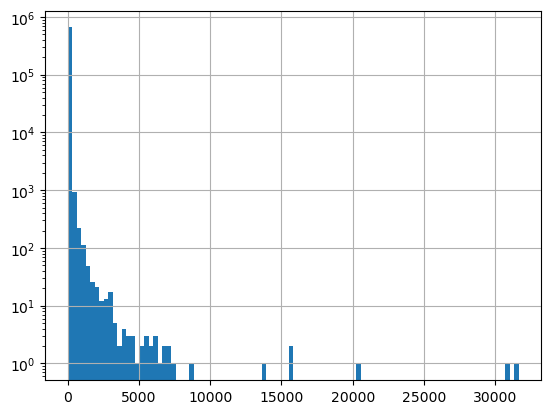

In [13]:
# distribution
authors.apply(lambda x : x.shape[0]).hist(bins=100, log=True)

Number of authors that we have to look into has dropped by more than a million, and now now average of tweets by author is close to 10.

Let's now group tweets that are posted at similar times by same author. We define that tweets are posted at similar times if they were posted within the week diiference. To do that, let's first make sure that all tweet_ids for each author are unique.

In [14]:
authors.apply(lambda x : x["id"].is_unique).all()

True

We see that there are some authors with tweets of same ids. Let's discover what are those. 

In [15]:
is_unique_id = authors.apply(lambda x : x["id"].is_unique)
is_unique_id

author_id
22                     True
47                     True
224                    True
246                    True
259                    True
                       ... 
1587912100969603072    True
1588140815548915712    True
1588230426069504000    True
1588334513175859200    True
1588569451217420288    True
Length: 659352, dtype: bool

In [16]:
is_unique_id[is_unique_id == False] 

Series([], dtype: bool)

In [17]:
tweets[(tweets["author_id"] == 21769704) & (tweets["id"] == 1577983961149620224)]

,id,created_at,source,possibly_sensitive,author_id,text,person_annotations,place_annotations,product_annotations,organization_annotations,...,like_count,quote_count,author_name,verified,protected,profile_image_url,author_followers_count,animated_gif_count,photo_count,video_count
360475,1577983961149620224,2022-10-06 11:27:48,Other,0,21769704,You’re missing out of the full story of climat...,1,0,0,0,...,0,0,Pan Macmillan @panmacmillan,1,0,1,67482,0,0,0


In [18]:
tweets[tweets["author_id"] == 21769704]["created_at"].value_counts()

2022-10-06 11:27:48    5
2022-10-21 10:23:00    2
2022-10-21 10:20:00    2
2022-10-06 11:27:49    2
Name: created_at, dtype: int64

In [19]:
tweets[(tweets["author_id"] == 38630618) & (tweets["id"] == 1384924894845181952)]

,id,created_at,source,possibly_sensitive,author_id,text,person_annotations,place_annotations,product_annotations,organization_annotations,...,like_count,quote_count,author_name,verified,protected,profile_image_url,author_followers_count,animated_gif_count,photo_count,video_count
6615591,1384924894845181952,2021-04-21 17:40:00,Other,0,38630618,Use our interactive 3D model to explore how ci...,0,0,0,0,...,0,0,Chatham House @ChathamHouse,1,0,1,256784,0,0,0


In [20]:
tweets[tweets["author_id"] == 38630618]["created_at"].value_counts()

2021-10-13 10:30:00    7
2021-04-21 17:46:00    6
2021-04-21 17:47:00    5
2021-10-13 08:30:00    4
2021-04-21 17:48:00    4
                      ..
2022-05-20 09:00:06    1
2022-05-19 04:00:12    1
2022-05-15 15:00:38    1
2022-05-14 10:00:12    1
2021-01-05 16:41:37    1
Name: created_at, Length: 714, dtype: int64

It seems to be hard to prceisely determine what tweets posted by author are actually different, so let's determine the tweet by its creation time and text. Tweets having those two categories same and created by the same author shell be considered the same. Both authors are bots.

In [21]:
big_authors = authors.filter(lambda x : x.shape[0] > 25000)
big_authors.head()

,id,created_at,source,possibly_sensitive,author_id,text,person_annotations,place_annotations,product_annotations,organization_annotations,...,like_count,quote_count,author_name,verified,protected,profile_image_url,author_followers_count,animated_gif_count,photo_count,video_count
46,1588680978330886144,2022-11-04 23:53:56,"Cheap Bots, Done Quick!",0,1329492481248014336,Hiya fellow humans! Your number one toxic comp...,0,0,0,1,...,0,0,environmental footprints @carboncompanies,0,0,1,175,0,0,0
206,1588674829925765120,2022-11-04 23:29:30,"Cheap Bots, Done Quick!",0,1442408319608516608,"I hate you already, but check this out. I woul...",0,0,0,0,...,0,0,EcoTerminator @ECOTerminator,0,0,1,8,0,0,0
315,1588670944330936320,2022-11-04 23:14:03,"Cheap Bots, Done Quick!",0,1329492481248014336,Welcome environmentalists! Today we have every...,0,0,0,0,...,0,0,environmental footprints @carboncompanies,0,0,1,175,0,0,0
380,1588668476226355200,2022-11-04 23:04:15,"Cheap Bots, Done Quick!",0,1329492481248014336,Hi eco-friendlies! Today we have everyone's fa...,0,0,0,1,...,0,0,environmental footprints @carboncompanies,0,0,1,175,0,0,0
446,1588667108736368640,2022-11-04 22:58:49,"Cheap Bots, Done Quick!",0,1442408319608516608,Ay yo ma Global warming is a real threat to ou...,0,0,0,0,...,0,0,EcoTerminator @ECOTerminator,0,0,1,8,0,0,0


In [22]:
big_authors['like_count'].describe()

count    62615.000000
mean         0.025074
std          0.222674
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         29.000000
Name: like_count, dtype: float64

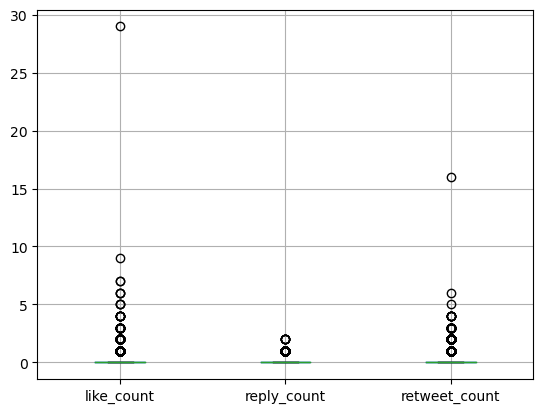

In [23]:
big_authors.boxplot(column=['like_count', 'reply_count', 'retweet_count']);

We can see that tweets that got any reactions are considered outliers.

There are two authors with enourmous number of tweets how ever both authors seem to have lots of irrelevant content with small number of reactions and very small number of followers (only 175 and **8**), it seem safe to skip their content.

In [26]:
data = {"author": [], "author_followers_count": [], "verified": [],
        "tweet_id1": [], "urls_count1": [], "url_image_count1": [], 
        "hashtags_count1": [], "animated_gif_count1": [], "photo_count1": [], "video_count1": [],
        "tweet_id2": [], "urls_count2": [], "url_image_count2": [],
        "hashtags_count2": [], "animated_gif_count2": [], "photo_count2": [], "video_count2": [], 
        "max_date": [], "min_date": [], "winner": []}

def add_to_data(row1, row2):    
    data['tweet_id1'].append(row1["id"])
    data['tweet_id2'].append(row2['id'])
    
    data['max_date'].append(max(row1['created_at'], row2['created_at']))
    data['min_date'].append(min(row1['created_at'], row2['created_at']))
    
    data['urls_count1'].append(row1['urls_count'])
    data['urls_count2'].append(row2['urls_count'])
    
    data['url_image_count1'].append(row1['url_image_count'])
    data['url_image_count2'].append(row2['url_image_count'])
    
    data['hashtags_count1'].append(row1['hashtags'])
    data['hashtags_count2'].append(row2['hashtags'])
    
    data['animated_gif_count1'].append(row1['animated_gif_count'])
    data['animated_gif_count2'].append(row2['animated_gif_count'])
    
    data['photo_count1'].append(row1['photo_count'])
    data['photo_count2'].append(row2['photo_count'])
    
    data['video_count1'].append(row1['video_count'])
    data['video_count2'].append(row2['video_count'])
    
    if row1['like_count'] + row1['retweet_count'] + row1['reply_count'] > row2['like_count'] + row2['retweet_count'] + row2['reply_count']:
        data['winner'].append(0)
    else:
        data['winner'].append(1)

i = 0
shape = []
for author in tqdm(authors):
    if author[1].shape[0] > 25_000:
        continue
    
    shape.append(author[1].shape[0])
    to_skip = set()
    for index1 in range(author[1].shape[0]):
        if index1 in to_skip:
            continue
        
        row1 = author[1].iloc[index1]
        for index2 in range(index1 + 1, min(author[1].shape[0], index1 + 1000)):
            row2 = author[1].iloc[index2]
            if row1["text"] == row2["text"] and row1["created_at"] == row2["created_at"]:
                to_skip.add(index2)
                continue
                
            if (row1['created_at'] - row2['created_at']).days >= 7:
                break
            
            score1 = row1['like_count'] + row1['retweet_count'] + row1['reply_count']
            score2 = row2['like_count'] + row2['retweet_count'] + row2['reply_count']
            maxi = max(score1, score2)
            mini = max(1, min(score1, score2))
            if (maxi - mini) < 10 or maxi / mini < 1.1:
                continue
            
            data["author"].append(author[0])
            data["author_followers_count"].append(row1["author_followers_count"])
            data["verified"].append(row1["verified"])
            
            # randomize adding which row goes first as their order is by default sorted by creation time
            if np.random.uniform() >= 0.5:
                add_to_data(row1, row2)
            else:
                add_to_data(row2, row1)
            
    i += 1
    if i % 20000 == 0:
        try:
            arr = np.array(shape)
            print(i, len(data["author"]), "Avg. shape", round(arr.mean(), 1), "Max", arr.max())
            shape = []
        except ValueError: 
            print(arr)

    if len(data["author"]) > 4e7:
        arr = np.array(shape)
        print(i, len(data["author"]), "Avg. shape", round(arr.mean(), 1), "Max", arr.max())
        break


data = pd.DataFrame(data)

  0%|          | 0/659352 [00:00<?, ?it/s]

20000 952306 Avg. shape 17.3 Max 5144
40000 1687917 Avg. shape 13.9 Max 7206
60000 1838340 Avg. shape 12.3 Max 4926
80000 2012101 Avg. shape 12.0 Max 2914
100000 2180696 Avg. shape 11.0 Max 5447
120000 2299246 Avg. shape 11.3 Max 4115
140000 2355085 Avg. shape 10.1 Max 1932
160000 2457394 Avg. shape 10.3 Max 2896
180000 2577886 Avg. shape 10.5 Max 5503
200000 2645386 Avg. shape 9.6 Max 2704
220000 2788815 Avg. shape 9.6 Max 2991
240000 2865897 Avg. shape 9.8 Max 6907
260000 3217495 Avg. shape 9.5 Max 4150
280000 3263208 Avg. shape 11.1 Max 20408
300000 3425961 Avg. shape 9.4 Max 3579
320000 3470173 Avg. shape 9.2 Max 1581
340000 3511241 Avg. shape 9.6 Max 6722
360000 3571117 Avg. shape 9.7 Max 6495
380000 3617369 Avg. shape 9.3 Max 5489
400000 3781178 Avg. shape 9.7 Max 4522
420000 4060253 Avg. shape 9.5 Max 15539
440000 4106535 Avg. shape 9.8 Max 15513
460000 4164238 Avg. shape 9.0 Max 4432
480000 4196443 Avg. shape 9.1 Max 7173
500000 4858723 Avg. shape 10.3 Max 13859
520000 4882935 

In [27]:
data.shape

(5226106, 20)

In [28]:
data.sample(5)

,author,author_followers_count,verified,tweet_id1,urls_count1,url_image_count1,hashtags_count1,animated_gif_count1,photo_count1,video_count1,tweet_id2,urls_count2,url_image_count2,hashtags_count2,animated_gif_count2,photo_count2,video_count2,max_date,min_date,winner
4191421,1134059457191776256,242646,1,1560688733577527296,0,0,0,0,0,0,1559994551309406208,0,0,0,0,0,0,2022-08-19 18:02:44,2022-08-17 20:04:18,1
2982128,950477244,70402,0,1444535182925643776,1,1,1,0,0,0,1442111717077655552,1,0,1,0,0,0,2021-10-03 05:30:00,2021-09-26 13:00:01,1
5007433,1390256111597522944,57,0,1419185374300033024,1,0,7,0,1,0,1416667098722357248,1,0,7,0,1,0,2021-07-25 06:38:55,2021-07-18 07:52:11,0
4497263,1203501231282565120,6729,0,1553585844413513728,1,1,0,0,0,0,1552440601618030592,1,1,0,0,0,0,2022-07-31 03:38:24,2022-07-27 23:47:37,0
2965929,950477244,70409,0,1446739708147650560,1,0,2,0,0,1,1446996400307277824,1,0,0,0,0,0,2021-10-10 00:30:00,2021-10-09 07:30:00,0


In [29]:
data['winner'].value_counts(normalize=True)

1    0.500367
0    0.499633
Name: winner, dtype: float64

In [30]:
data.sort_values(by=['max_date', 'min_date', 'author'], ascending=True, inplace=True)
data.head()

,author,author_followers_count,verified,tweet_id1,urls_count1,url_image_count1,hashtags_count1,animated_gif_count1,photo_count1,video_count1,tweet_id2,urls_count2,url_image_count2,hashtags_count2,animated_gif_count2,photo_count2,video_count2,max_date,min_date,winner
2895550,904408999,69106,0,1344835772042588160,0,0,2,0,0,0,1344820943114424320,0,0,2,0,0,0,2021-01-01 02:40:08,2021-01-01 01:41:13,1
1377280,16973333,3649710,1,1344844708087013376,1,0,0,0,0,0,1344795903966720000,1,0,0,0,0,0,2021-01-01 03:15:39,2021-01-01 00:01:43,0
3204001,950477244,70336,0,1344825419036385280,1,0,2,0,0,1,1344855617937223680,1,0,2,0,0,0,2021-01-01 03:59:00,2021-01-01 01:59:00,1
2521600,269815420,13727,0,1344820027720011776,0,0,0,0,0,0,1344876540698349568,1,1,2,0,0,0,2021-01-01 05:22:08,2021-01-01 01:37:34,0
2521599,269815420,13727,0,1344877244854878208,1,1,2,0,0,0,1344820027720011776,0,0,0,0,0,0,2021-01-01 05:24:56,2021-01-01 01:37:34,1


In [31]:
data.tail()

,author,author_followers_count,verified,tweet_id1,urls_count1,url_image_count1,hashtags_count1,animated_gif_count1,photo_count1,video_count1,tweet_id2,urls_count2,url_image_count2,hashtags_count2,animated_gif_count2,photo_count2,video_count2,max_date,min_date,winner
4845383,1207638939277955072,20671,1,1588681291595223040,1,1,1,0,0,0,1586659303817084928,1,1,0,0,0,0,2022-11-04 23:55:10,2022-10-30 10:00:31,1
4845382,1207638939277955072,20671,1,1588681291595223040,1,1,1,0,0,0,1586674411188490240,1,1,0,0,0,0,2022-11-04 23:55:10,2022-10-30 11:00:33,1
4845381,1207638939277955072,20671,1,1587384085898469376,1,1,1,0,0,0,1588681291595223040,1,1,1,0,0,0,2022-11-04 23:55:10,2022-11-01 10:00:32,0
4845380,1207638939277955072,20671,1,1588681291595223040,1,1,1,0,0,0,1587625699598270464,2,1,0,0,1,0,2022-11-04 23:55:10,2022-11-02 02:00:38,1
4845379,1207638939277955072,20671,1,1588154325678817280,1,1,0,0,0,0,1588681291595223040,1,1,1,0,0,0,2022-11-04 23:55:10,2022-11-03 13:01:12,0


In [32]:
data.to_pickle("../data/pairs10%.pkl.bz2", compression='bz2')